In [5]:
import numpy as np
import matplotlib.pylab as plt
import xarray as xr
import seaborn 
import pandas as pd
import pandas as pd
from scipy.stats import norm
import matplotlib.gridspec as gridspec
seaborn.set()
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (18, 12),
         'axes.labelsize': 28,
         'axes.titlesize':28,
         'xtick.labelsize':28,
         'ytick.labelsize':28,
         'axes.labelweight':'bold',
          'legend.fontsize': 28}
         
plt.rcParams.update(params)
#plt.matplotlib.rc('font', **font)

In [6]:
#plt.rcParams.keys()

In [3]:
# Load MeerKAT baseline
bl_len = pd.read_csv('/data/isaac/DR1/meerkatbaselinelengh.csv')
bl_len = bl_len.iloc[:,1:].values[0]
# Baseline index sorted by ascending order
indx = np.argsort(bl_len)

In [965]:
###### Path to the DR0 and DR1 data-set
#FileName1 = '/data/isaac/DR0/verification/verifDR0.zarr/'#'/data/isaac/DR0/Single_obsDR0/DR0Full2.zarr/'
#FileName2 = '/data/isaac/DR1/verification/verifDR1.zarr/'
FileName1 = '/data/isaac/DROvv.zarr/'
FileName2 = '/data/HPRFI/DR1VV.zarr/'
##### Loading the data
#MyData1 = xr.open_zarr(FileName1)
MyData2 = xr.open_zarr(FileName2)
##### Combining two dataset
data = MyData1+MyData2
##### Extracting the Master and the Counter array
MyMaster = data.master.astype(float)
MyCounter =data.counter.astype(float)
freqValues = data.frequency.values/1e6

In [966]:
def mean(MyMaster,MyCounter):
    '''
    Takes the master and counter as well as dimension u are
    interested in.
    
    Returns : Probability array for the dimension u chose. 
    '''
    print('time')
    MyMeanTimeMaster = MyMaster.sum(dim = ['frequency','baseline','elevation','azimuth']) 
    MyMeanTimeCounter = MyCounter.sum(dim = ['frequency','baseline','elevation','azimuth'])
    MyMeanTimeProb = MyMeanTimeMaster.astype(float)/MyMeanTimeCounter.astype(float)
    time = MyMeanTimeProb.persist().values
    
    print('frequency')
    MyMeanFreqMaster = MyMaster.sum(dim = ['time','baseline','elevation','azimuth']) 
    MyMeanFreqCounter = MyCounter.sum(dim = ['time','baseline','elevation','azimuth'])
    MyMeanFreqProb = MyMeanFreqMaster.astype(float)/MyMeanFreqCounter.astype(float)
    freq = MyMeanFreqProb.persist().values
    
    print('elevation')
    MyMeanElMaster = MyMaster.sum(dim = ['frequency','baseline','time','azimuth']) 
    MyMeanElCounter = MyCounter.sum(dim = ['frequency','baseline','time','azimuth'])
    MyMeanElProb = MyMeanElMaster.astype(float)/MyMeanElCounter.astype(float)
    el = MyMeanElProb.persist().values
    

    print('baseline')
    MyMeanBlMaster = MyMaster.sum(dim = ['frequency','time','elevation','azimuth']) 
    MyMeanBlCounter = MyCounter.sum(dim = ['frequency','time','elevation','azimuth'])
    MyMeanBlProb = MyMeanBlMaster.astype(float)/MyMeanBlCounter.astype(float)
    bl = MyMeanBlProb.persist().values
        
    print('azimuth')
    MyMeanAzMaster = MyMaster.sum(dim = ['frequency','baseline','elevation','time']) 
    MyMeanAzCounter = MyCounter.sum(dim = ['frequency','baseline','elevation','time'])
    MyMeanAzProb = MyMeanAzMaster.astype(float)/MyMeanAzCounter.astype(float)
    az = MyMeanAzProb.persist().values
    return time,freq,bl,el,az

In [967]:
ave = mean(MyMaster,MyCounter) 

time
frequency
elevation
baseline
azimuth


In [901]:
tt = np.load('/data/isaac/DR1/clean_time.npy')

In [898]:
# Load the 1-D data for each file 
def One_D_prob():
    dimension = ['time','frequency','baseline','elevation','azimuth']
    prob = []
    for dim in dimension:
        if dim =='time':
            #t0 = np.load('/data/isaac/DR0/one_D_Arrays/time_mean_R0.npy')
            #t1 = np.load('/data/isaac/DR1/one_D_Arrays/Time_DR1_ave.npy')
            t0 =  np.load('/data/isaac/DR0/DR0_time_clean_band.npy')
            t1 = np.load('/data/HPRFI/DR1_time_clean_band.npy')
        if dim =='frequency':
            t0 = np.load('/data/isaac/DR0/one_D_Arrays/Frequency_mean_R0.npy')
            t1 = np.load('/data/isaac/DR1/one_D_Arrays/Frequency_DR1_ave.npy')
        if dim =='baseline':
            t0 = np.load('/data/isaac/DR0/one_D_Arrays/Baseline_mean_R0.npy')
            t1 = np.load('/data/isaac/DR1/one_D_Arrays/Baseline_DR1_ave.npy')
        if dim =='elevation':
            t0 = np.load('/data/isaac/DR0/one_D_Arrays/Elevation_mean_R0.npy')
            t1 = np.load('/data/isaac/DR1/one_D_Arrays/Elevation_DR1_ave.npy')
        if dim=='azimuth':
            t0 = np.load('/data/isaac/DR0/one_D_Arrays/Azimuth_mean_R0.npy')
            t1 = np.load('/data/isaac/DR1/one_D_Arrays/Azimuth_DR1_ave.npy')
        # Delete the 24th observation the one with infinity
        t1_del = np.delete(t1,24,0)
        t1_del = t1_del.tolist()
        # Combine dr0 and dr1 dataset
        for i in range(t0.shape[0]):
            t1_del.append(t0[i,:])
        prob.append(np.array(t1_del))
        
    return prob 

In [899]:
prob = One_D_prob()

In [900]:
time = prob[0]
freq = prob[1]
bl = prob[2]
El =prob[3]
Az = prob[4]

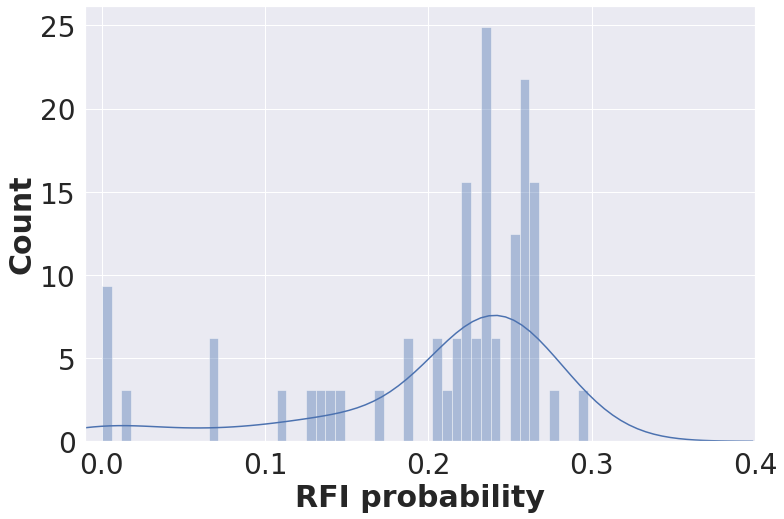

In [527]:
nu = 10
plt.figure(figsize=(12,8))
sns.distplot(time[:,nu][np.where(~np.isnan(time[:,nu]))],bins=50)
plt.xlabel('RFI probability',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.xlim(-0.01,0.4)
plt.show()

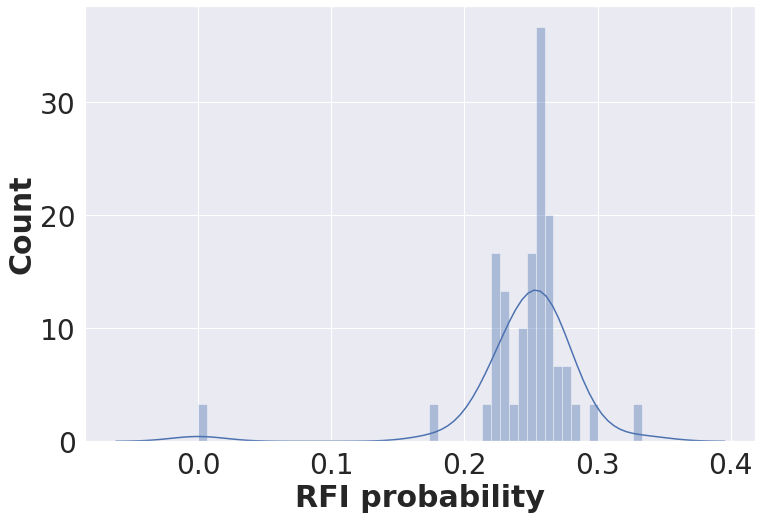

In [528]:
nu = 7
plt.figure(figsize=(12,8))
sns.distplot(time[:,nu][np.where(~np.isnan(time[:,nu]))],bins=50)
plt.xlabel('RFI probability',fontsize=30)
plt.ylabel('Count',fontsize=30)
plt.show()

In [266]:
con95 = 95
con68 = 68

def err(arr,ave,conf):
    lower2 = np.zeros(arr.shape[1])
    upper2 = np.zeros(arr.shape[1])
    med = np.zeros(arr.shape[1])
    lim = (100-conf)/2
    upper = 100 - lim
    lower = lim
    for i in range(arr.shape[1]):
        data = np.sort(arr[:,i])
        idx = np.where((~np.isnan(data))&(data!=0))[0]
        if np.sum(data)==0:
            idx = np.where(~np.isnan(data))[0]
        data = np.sort(data[idx])
        upper2[i] = np.percentile(data,upper)
        lower2[i] = np.percentile(data,lower)
        med[i] = np.nanmedian(data)
    return lower2, upper2,med

In [267]:
def err(arr,ave,conf):
    arr = np.array(arr)
    lower = (100-conf)/2.0
    upper = 100 - lower
    l = np.zeros(arr.shape[1])
    u = np.zeros(arr.shape[1])
    med =  np.zeros(arr.shape[1])
   
    for i in range(arr.shape[1]):
        idx = np.where(~np.isnan(arr[:,i])&(arr[:,i]!=0))[0]
        if np.sum(idx)==0:
             data = np.sort(arr[:,i])
        else:
            data = np.sort(arr[:,i][idx])
        l[i] = np.percentile(data,lower)
        u[i] =  np.percentile(data,upper)
        med[i] = np.nanmedian(data)
    return l,u,med

In [268]:
ElAzProb = np.load('/data/isaac/DR1/ElAzProb.npy')

In [269]:
freqtime = np.load('/data/isaac/DR1/timefreq.npy')

In [547]:
np.arange(0,1.1,0.4)

array([0. , 0.4, 0.8])

In [721]:
plt.style.available?

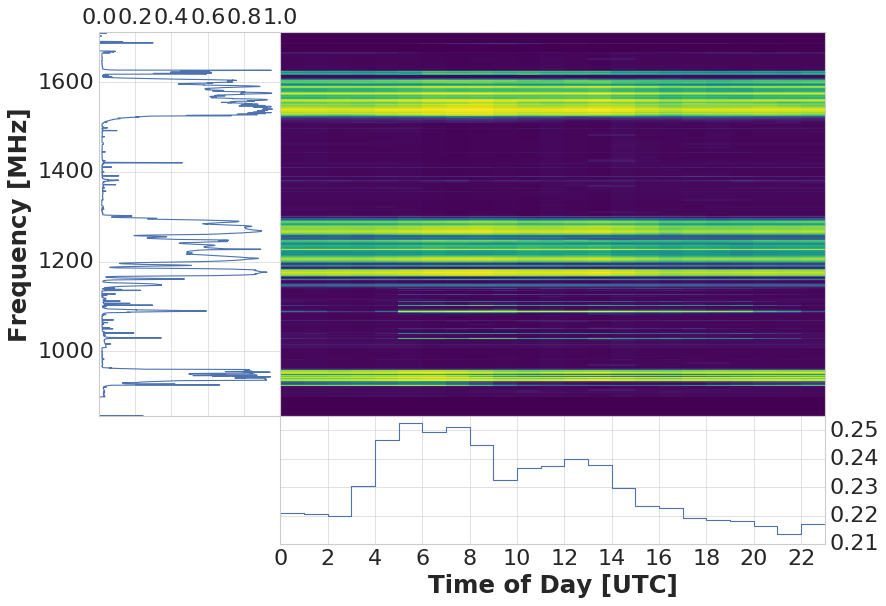

In [671]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,8))
gs = gridspec.GridSpec(2, 3, width_ratios=[1,3,0.1], height_ratios=[3,1])
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
#ax3 = plt.subplot(gs[2])
ax4 = plt.subplot(gs[4])

ax1.plot(ave[1],freqValues,lw=1.0)
ax1.xaxis.tick_top()
#ax1.set_ylim(MyMeanFreqProb.frequency.frequency.values[0],MyMeanFreqProb.frequency.frequency[-1])
ax1.set_ylim(freqValues[0],freqValues[-1])
#ax1.set_xticks(np.arange(0,1.1,0.2))
#ax4.set_xticks(np.arange(0,1,step=.2))
#ax1.set_xticklabels(np.arange(0,1.1,0.2))
ax1.set_ylabel('Frequency [MHz]', fontsize=22)

pc = ax2.pcolormesh( data.time, data.frequency, freqtime,cmap='viridis')#, vmin=0.0)#, vmax=4.5)
ax2.set_xlim(data.time.data[0], data.time.data[-1])
ax2.set_ylim(data.frequency.data[0], data.frequency.data[-1])
ax2.set_xticklabels('')
ax2.set_yticklabels('')

#plt.colorbar(pc,ax=ax3)
#ax3.set_xticklabels('')
#ax3.set_yticklabels('')

ax4.step(data.time.data, ave[0], '-')#where='post')
ax4.yaxis.tick_right()
ax4.set_xlim(0,23)
#ax4.set_ylim(0.15,0.3)
#ax3.set_xticks(4*np.arange(6), ["00H00", "04H00", "08H00", "12H00", "16H00", "20H00", "24H00"])
ax4.set_xticks(np.arange(0,23,step=2))
#ax4.fill_between(np.arange(ave[0].shape[0]), ave[0]-er95[0], ave[0]+er95[1],color='r',alpha=0.3,label=str(con95)+'% Percentile Confidence interval')
#ax4.fill_between(np.arange(ave[0].shape[0]), ave[0]-er68[0], ave[0]+er68[1],color='g',alpha=0.6,label=str(con68)+'% Percentile Confidence interval')
               
ax4.set_xlabel('Time of Day [UTC]', fontsize=22)

plt.subplots_adjust(wspace=0.0, hspace=0.0)
#plt.savefig(outputfile+'.png')
plt.show()

In [902]:
er95 = err(time,tt,conf=con95)
er68 = err(time,tt,conf=con68)
m,c = np.polyfit(np.arange(24),tt,deg=1)
x = np.arange(0,24,1)
fit = m*x + c

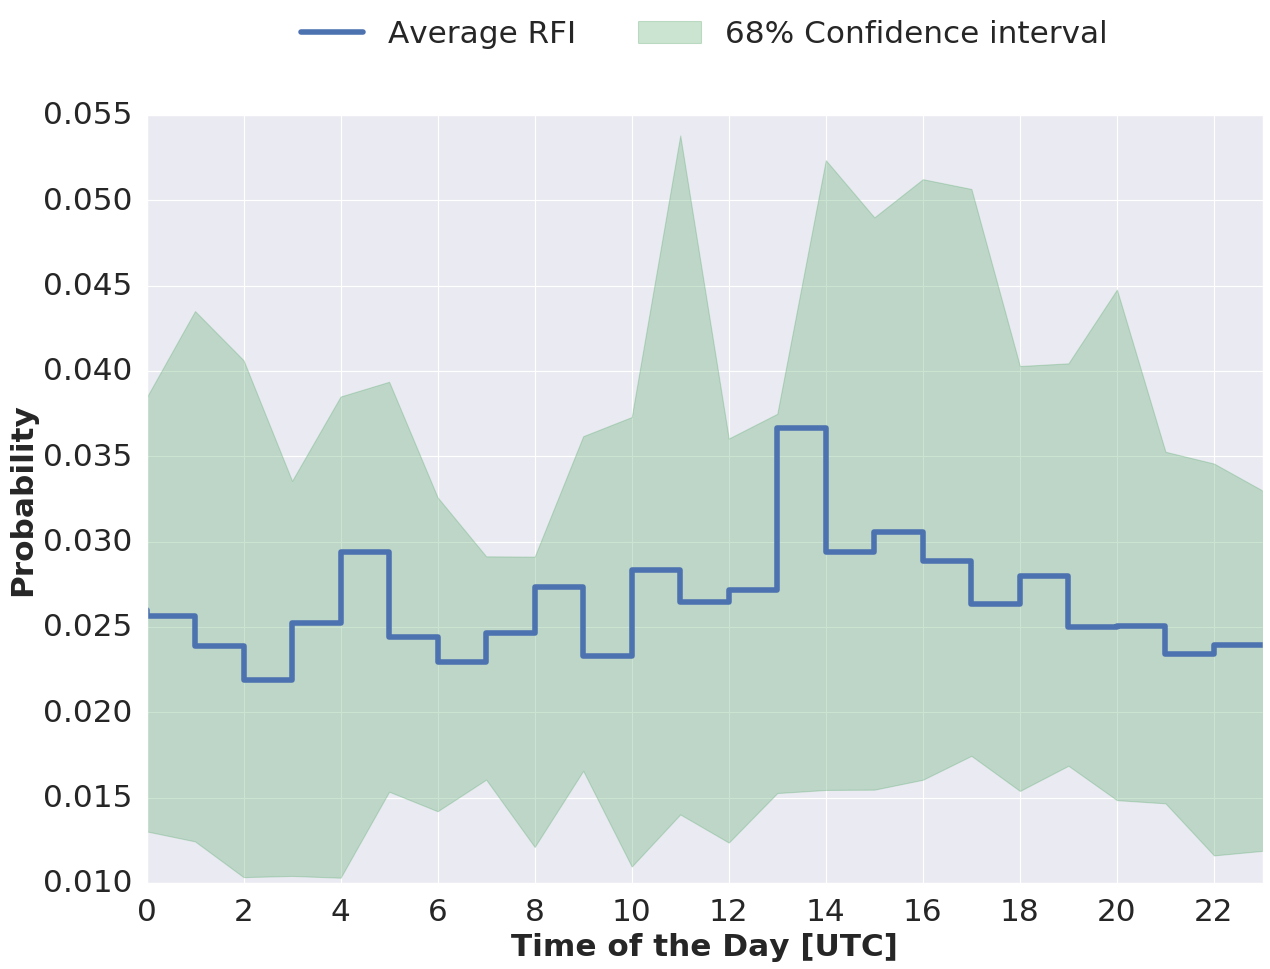

In [905]:
#plt.figure(figsize=(12,8))
plt.step(np.arange(ave[0].shape[0]),tt,label='Average RFI',linewidth=5)
#plt.fill_between(np.arange(ave[0].shape[0]), er95[0], er95[1],color='r',alpha=0.3,label=str(con95)+'% Percentile Confidence interval')
plt.fill_between(np.arange(ave[0].shape[0]), er68[0], er68[1],color='g',alpha=0.3,label=str(con68)+'% Confidence interval')
#plt.plot(np.arange(24),fit,'k',label='Best fit: m =  {0:1.3f}, c = {1:1.3f} '.format(m,c),alpha=1.0,linewidth=2)
plt.xlabel('Time of the Day [UTC]',fontsize=28)
plt.ylabel('Probability',fontsize=28)
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.xlim(0,23)
plt.xticks(np.arange(0,23,step=2))
#plt.legend(loc='lower right')
plt.show()

In [838]:
er95 = err(freq,ave[1],conf=con95)
er68 = err(freq,ave[1],conf=con68)

In [839]:
ff = er95[2]

In [840]:
iii = np.where(ave[1][ii]>=0.1)[0]

In [822]:
np.where(freqValues==freqValues[ii][iii][0])

(array([1]),)

In [823]:
freqValues[ii][iii][0]

856.208984375

In [824]:
freqValues[ii][iii][4]

925.3828125

In [825]:
ii = np.where((freqValues>=1310)&(freqValues<=1500))[0]

In [826]:
plt.plot(freqValues[ii][iii],ave[1][ii][iii],'.',label='Average RFI',linewidth=3,)

IndexError: index 1103 is out of bounds for axis 0 with size 909

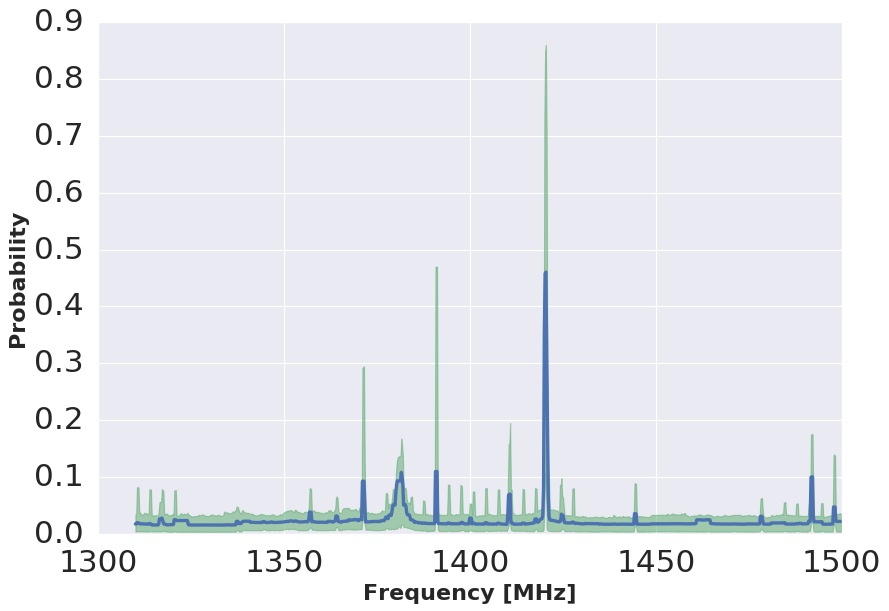

In [827]:
plt.figure(figsize=(12,8))
plt.plot(freqValues[ii],ave[1][ii],label='Average RFI',linewidth=3,)
plt.fill_between(freqValues[ii], er68[0][ii], er68[1][ii],color='g',alpha=0.5,label=str(con68)+'% Percentile Confidence interval')
plt.xlabel('Frequency [MHz]',fontsize=20)
plt.ylabel('Probability',fontsize=20)
plt.show()

In [828]:
ii = np.where((freqValues>=980)&(freqValues<=1070))[0]

In [829]:
iii = np.where(ave[1][ii]>=0.1)[0]

In [830]:
freqValues[ii][iii]

array([1029.24804688, 1029.45703125, 1029.66601562, 1029.875     ,
       1030.08398438, 1030.29296875, 1030.50195312, 1030.7109375 ,
       1040.7421875 , 1040.95117188, 1041.16015625, 1041.36914062])

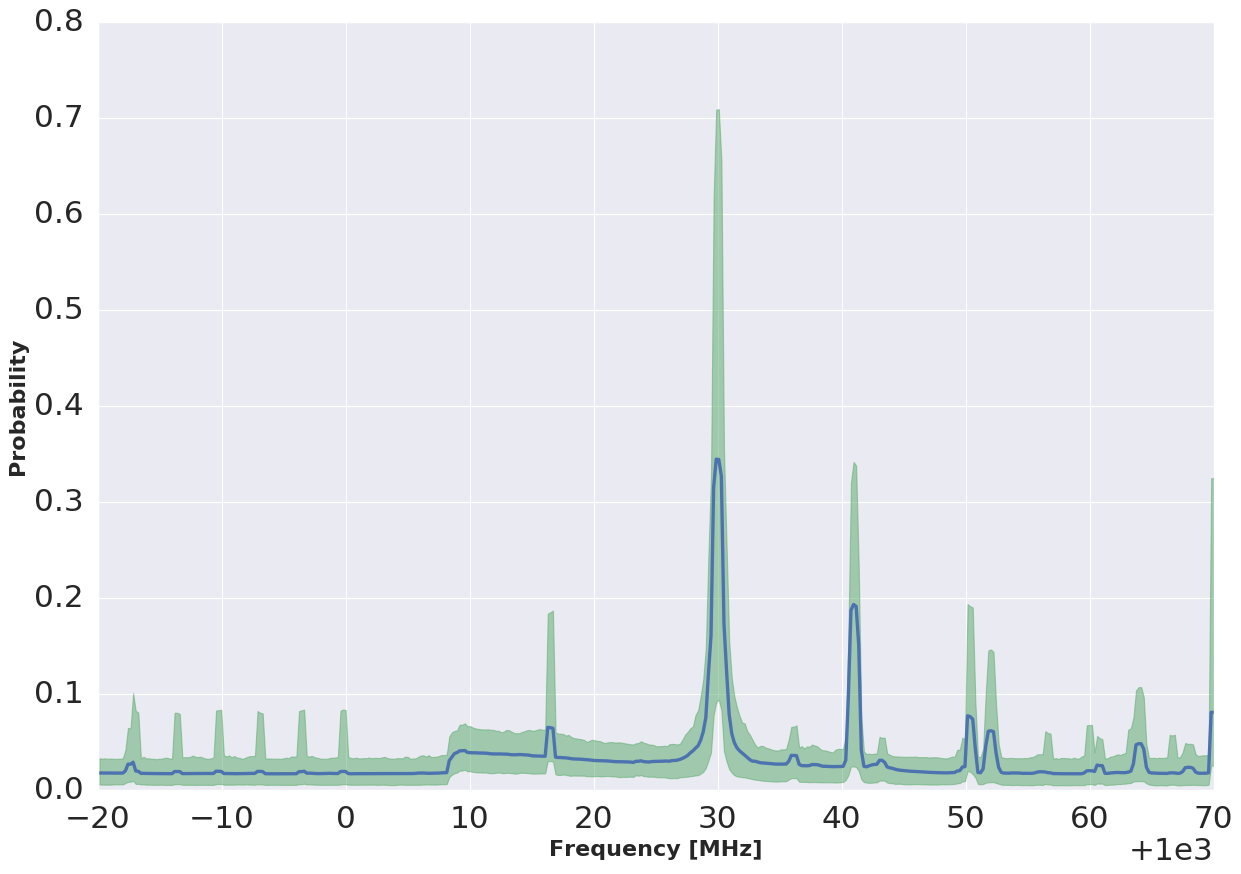

In [831]:
plt.plot(freqValues[ii],ave[1][ii],label='Average RFI',linewidth=3)
plt.fill_between(freqValues[ii], er68[0][ii], er68[1][ii],color='g',alpha=0.5,label=str(con68)+'% Percentile Confidence interval')
plt.xlabel('Frequency [MHz]',fontsize=20)
plt.ylabel('Probability',fontsize=20)
plt.show()

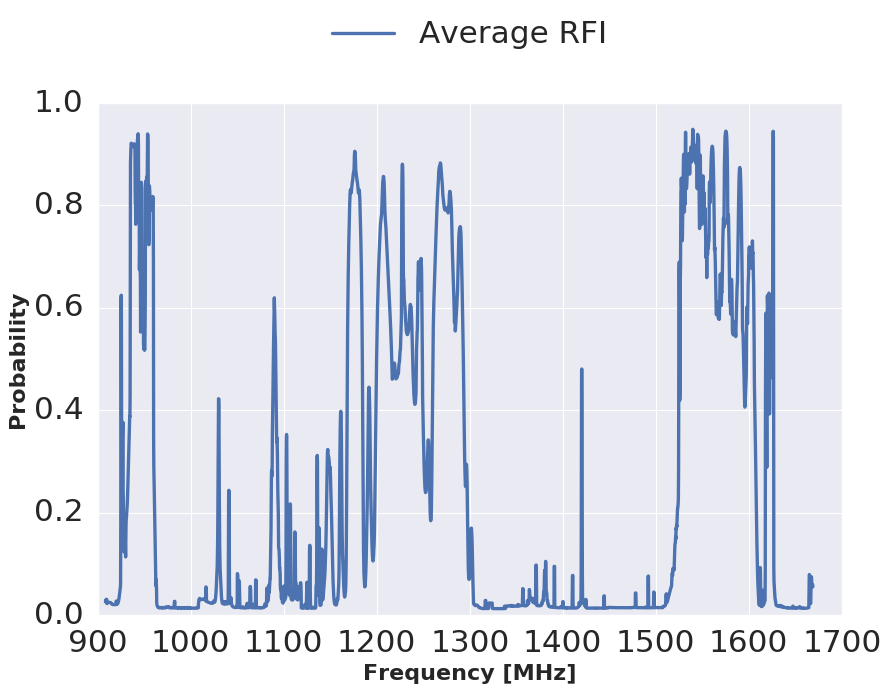

In [968]:
plt.figure(figsize=(12,8))
plt.plot(freqValues[250:3891],ave[1][250:3891],label='Average RFI',linewidth=3)#,yerr=[er[0],er[1]],label='data')#,ecolor='red')
#plt.fill_between(freqValues[250:3891], er95[0][250:3891], er95[1][250:3891],color='r',alpha=0.3,label=str(con95)+'% Percentile Confidence interval')
#plt.fill_between(freqValues[250:3891], er68[0][250:3891], er68[1][250:3891],color='g',alpha=0.5,label=str(con68)+'% Confidence interval')
plt.xlabel('Frequency [MHz]',fontsize=20)
plt.ylabel('Probability',fontsize=20)
#plt.xticks()
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.show()

In [923]:
er95 = err(bl,ave[2],conf=con95)
er68 = err(bl,ave[2],conf=con68)
from matplotlib.ticker import MaxNLocator

<Figure size 960x640 with 0 Axes>

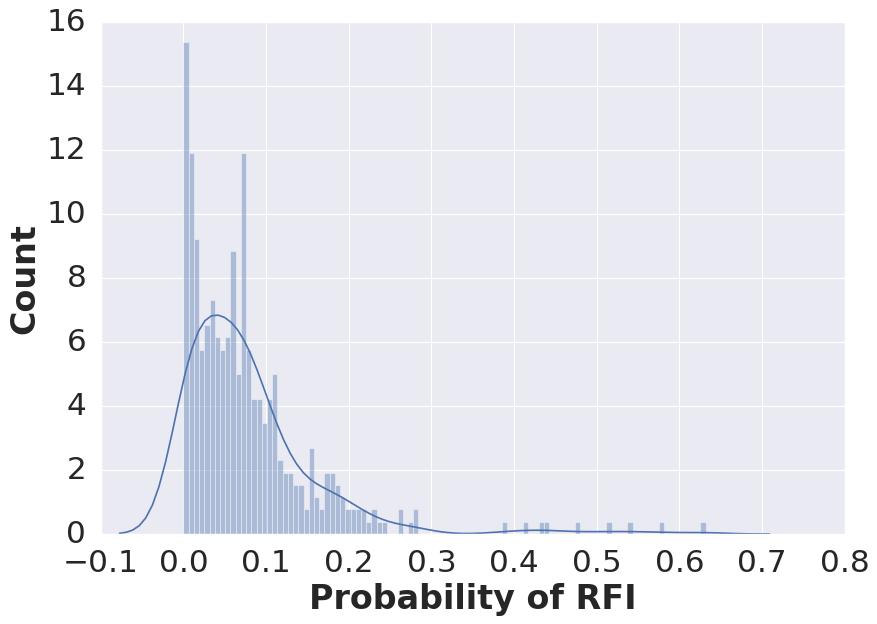

In [785]:
plt.figure(figsize=(12,8))
ax = plt.figure(figsize=(12,8)).gca()
sns.distplot(freq[:,2517][np.where(~np.isnan(freq[:,2515]))],bins=100)
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
#plt.ylim(0,25)
plt.ylabel('Count',fontsize = 30)
plt.xlabel('Probability of RFI',fontsize = 30)
plt.show()

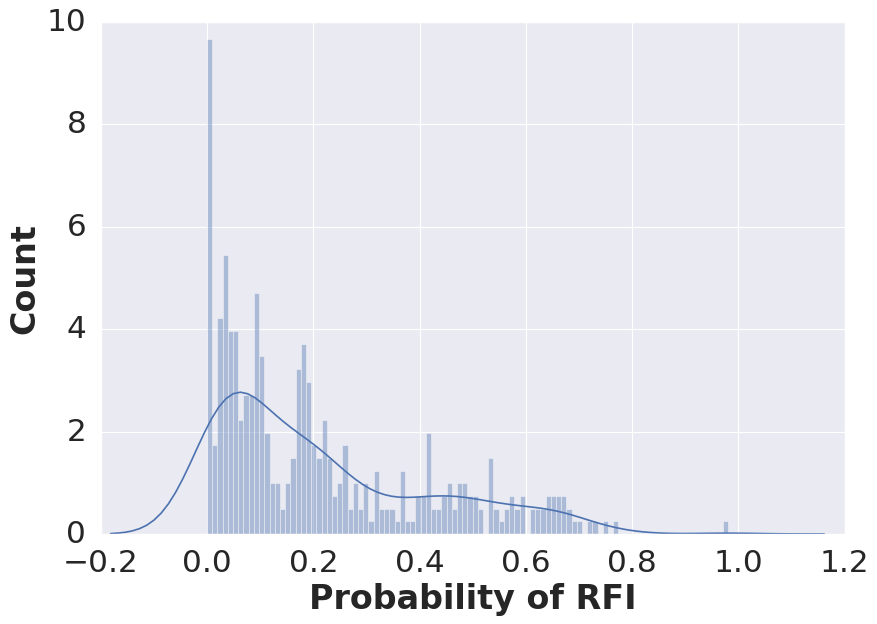

In [786]:
plt.figure(figsize=(12,8))
sns.distplot(freq[:,2560][np.where(~np.isnan(freq[:,2900]))],bins=100)
#plt.ylim(0,25)
plt.ylabel('Count',fontsize = 30)
plt.xlabel('Probability of RFI',fontsize = 30)
plt.show()

In [906]:
bb =er95[2]

In [907]:
# def func_powerlaw(x, m, c, c0):
#     return c0 + x**m * c

In [908]:
from scipy.optimize import curve_fit

In [909]:
def func_powerlaw(x,c0,c,a):
    return c0 + (x**a)*c

In [910]:
x = bl_len[indx]
y = ave[2][indx]

In [911]:
sol2 = curve_fit(func_powerlaw, x, y, p0 = np.asarray([0.4,-0.8,2]))

In [912]:
c0 = sol2[0][0]
c = sol2[0][1]
a = sol2[0][2]

In [913]:
print(c0,c,a)

0.3667084490768157 -0.009113015884324678 0.3870328748947616


In [921]:
xx

array([0.00000000e+00, 3.97022333e+00, 7.94044665e+00, ...,
       7.99205955e+03, 7.99602978e+03, 8.00000000e+03])

In [917]:
xx=np.linspace(0,8000,2016)

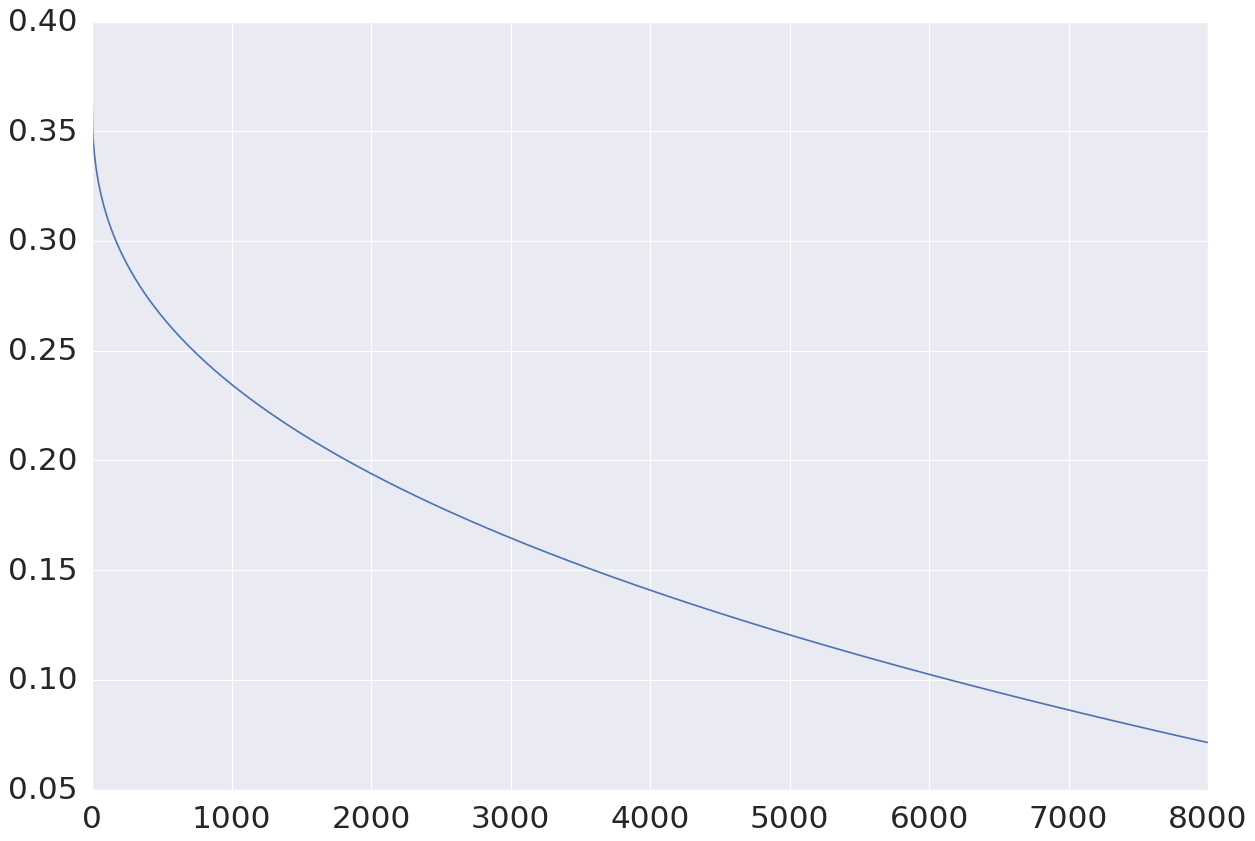

In [920]:
plt.plot(xx, func_powerlaw(xx,c0,c,a))

In [938]:
#np.save('/data/HPRFI/Blprob.npy',ave[2])

In [939]:
#np.save('/data/HPRFI/bl_length.npy',bl_len)

In [7]:
#print(c0,c,a)

In [1]:
#plt.figure(figsize=(15,10))
plt.plot(bl_len[indx][ii],ave[2][indx][ii],'.',label='Average RFI',ms=10)#,yerr=er,label='data',ecolor='red',fmt='.')
plt.fill_between(bl_len[indx][ii], er95[0][indx][ii], er95[1][indx][ii],alpha=0.3,label=str(con95)+'% confidence inetrval',color='r')
plt.fill_between(bl_len[indx], er68[0][indx], er68[1][indx],alpha=0.3,label=str(con68)+' confidence interval',color='y')
#plt.plot(xx,func_powerlaw(xx,c0,c,a),'k-',linewidth=2.0,label =r'$y = -0.01\times X^{0.39}+ 0.37$')
plt.xlabel('Baseline length [m]',fontsize=28)
#plt.plot(x, curveFit)
plt.ylabel('Probability',fontsize=28)
plt.xlim(bl_len[indx][ii][0],bl_len[indx][ii][-1])
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.show()


NameError: name 'plt' is not defined

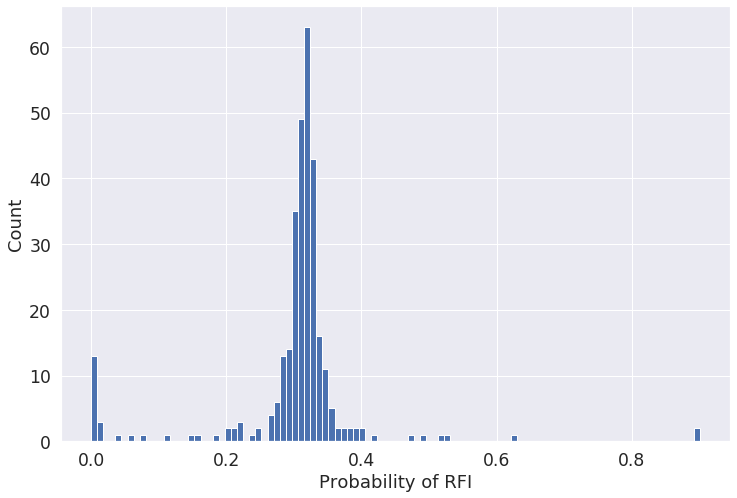

In [321]:
plt.figure(figsize=(12,8))
plt.hist(bl[:,indx][:,100],bins=100)
#plt.ylim(0,25)
plt.ylabel('Count',fontsize = 18)
plt.xlabel('Probability of RFI',fontsize = 18)
plt.show()

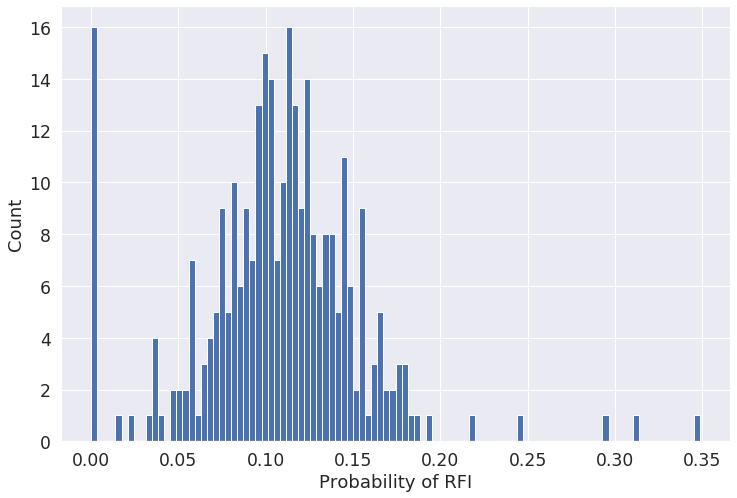

In [324]:
plt.figure(figsize=(12,8))
plt.hist(bl[:,indx][:,2001],bins=100)
#plt.ylim(0,25)
plt.ylabel('Count',fontsize = 18)
plt.xlabel('Probability of RFI',fontsize = 18)
plt.show()

In [325]:
bl_len[indx][2001]

5980.752459279465

In [782]:
er95 = err(El,ave[3],conf=con95)
er68 = err(El,ave[3],conf=con68)
m,c = np.polyfit(np.arange(8),ave[3],deg=1)
x = np.arange(0,8,1)
fit = m*x + c

In [739]:
ee= er95[2]

In [722]:
plt.style.use('seaborn')

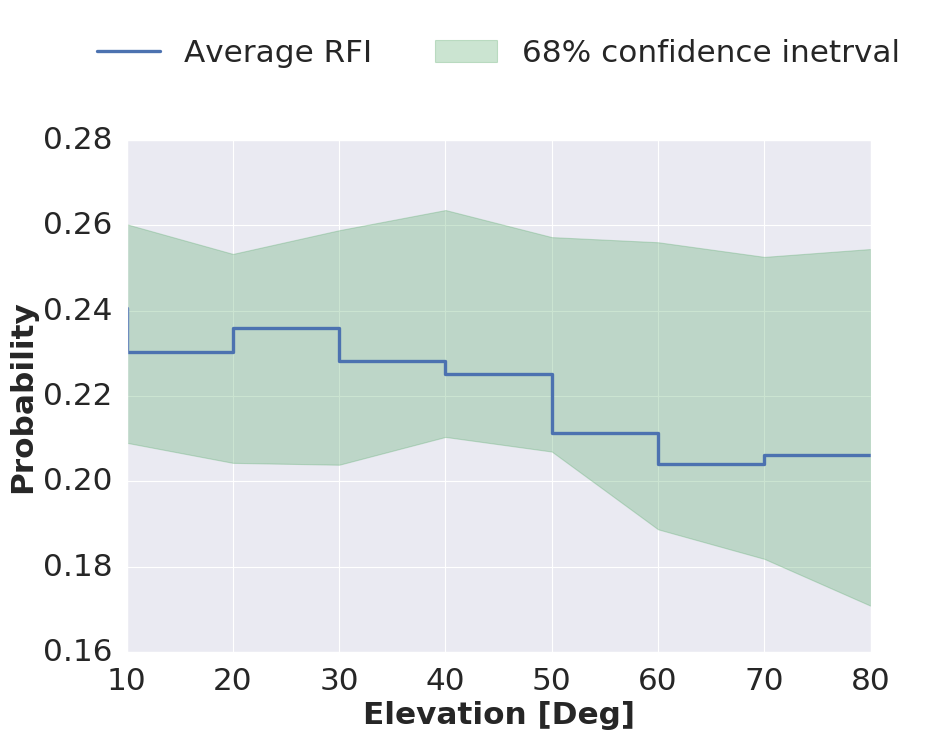

In [783]:
plt.figure(figsize=(12,8))
plt.step(np.arange(ave[3].shape[0]),ave[3],label='Average RFI',linewidth=3)
#plt.fill_between(np.arange(ave[3].shape[0]), er95[0], er95[1],color='r',alpha=0.3,label=str(con95)+'% confidence inetrval')
plt.fill_between(np.arange(ave[3].shape[0]),er68[0], er68[1],color='g',alpha=0.3,label=str(con68)+'% confidence inetrval')
#plt.plot(np.arange(8),fit,'k',label='Best fit')
plt.xlabel('Elevation [Deg]',fontsize=28)
plt.ylabel('Probability',fontsize=28)
plt.xticks(np.arange(ave[3].shape[0]),np.arange(10,100,10))
plt.xlim(np.arange(ave[3].shape[0])[0],np.arange(ave[3].shape[0])[-1])
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True,framealpha=0.7,borderpad=1)
plt.show()

In [759]:
er95 = err(Az,ave[4],conf=con95)
er68 = err(Az,ave[4],conf=con68)
m,c = np.polyfit(np.arange(24),ave[4],deg=1)
x = np.arange(0,24,1)
fit = m*x + c

In [748]:
aa= er95[2]

In [766]:
ave[4].shape[0]

24

In [767]:
360/30

12.0

In [768]:
len(np.arange(0,ave[4].shape[0],2))

12

In [770]:
len(np.arange(0,360,30))

12

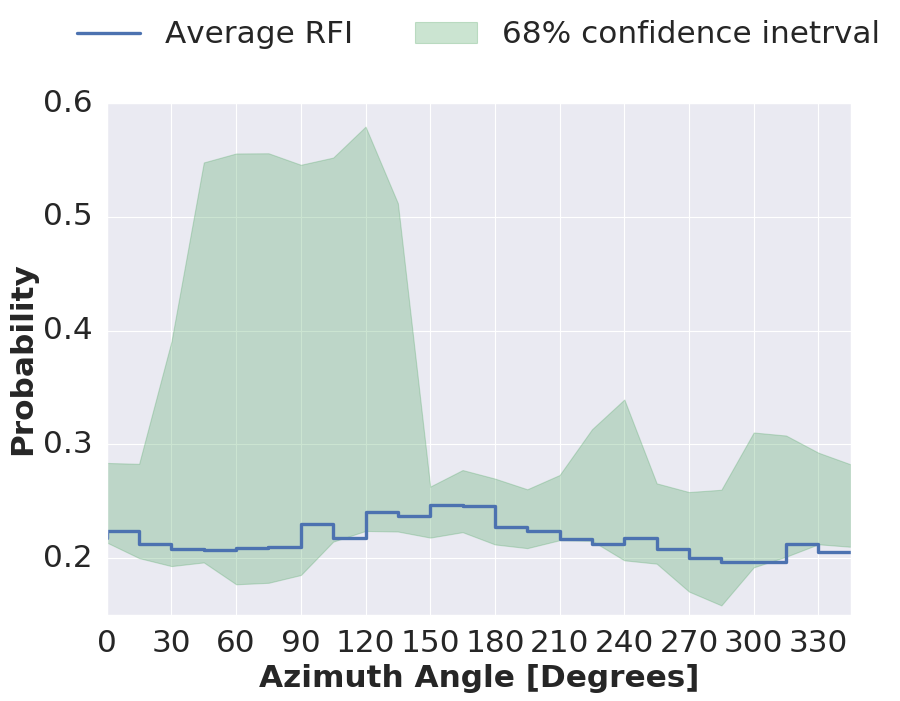

In [771]:
plt.figure(figsize=(12,8))
plt.step(np.arange(ave[4].shape[0]),ave[4],label='Average RFI',linewidth=3)#,yerr=er,label='data',ecolor='red')
#plt.fill_between(np.arange(ave[4].shape[0]),er95[0], er95[1],color='r',alpha=0.3,label=str(con95)+'% confidence inetrval')
plt.fill_between(np.arange(ave[4].shape[0]), er68[0], er68[1],color='g',alpha=0.3,label=str(con68)+'% confidence inetrval')
plt.xlabel('Azimuth Angle [Degrees]',fontsize=28)
#plt.plot(np.arange(24),fit,'k',label='Best fit')
plt.ylabel('Probability',fontsize=28)
plt.xlim(np.arange(ave[4].shape[0])[0],np.arange(ave[4].shape[0])[-1])
plt.xticks(np.arange(0,ave[4].shape[0],2),np.arange(0,360,30))
plt.legend(loc='lower center', bbox_to_anchor=(0.5, 1.05),
          ncol=3, fancybox=True, shadow=True)
plt.show()

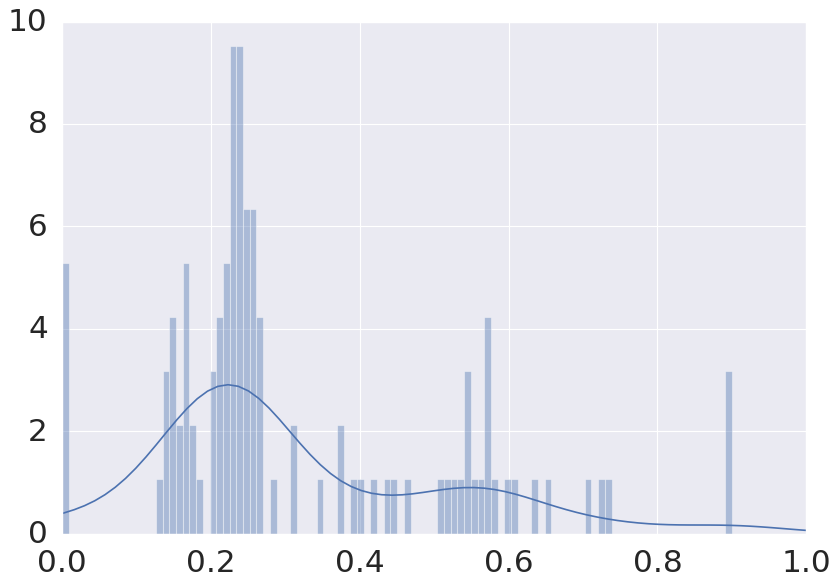

In [780]:
plt.figure(figsize=(12,8))
sns.distplot(Az[:,4][np.where(~np.isnan(Az[:,4]))],bins = 100)
plt.xlim(0,1)
plt.show()

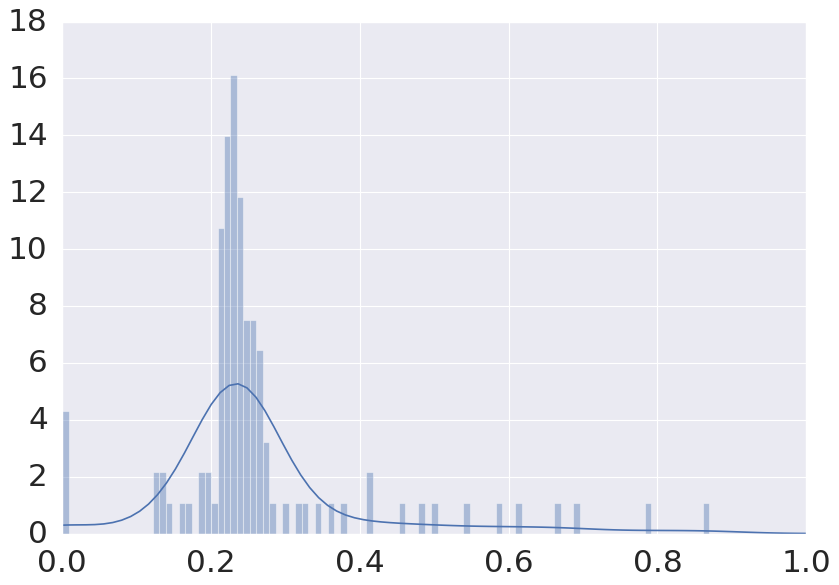

In [781]:
plt.figure(figsize=(12,8))
sns.distplot(Az[:,15][np.where(~np.isnan(Az[:,15]))],bins = 100)
plt.xlim(0,1)
plt.show()

In [107]:
def gauss(x):
    #f1 = norm.pdf(x,0,1)
    f =  (1/np.sqrt(2*np.pi))*np.exp((-x**2)/2.)
    return f
def zstats(c):
    C = c/2.
    x = np.linspace(0,5,5000)
    dx = x[1]-x[0]
    a_pdf = gauss(x)*dx
    
    for i in range(len(x)):
        if np.sum(a_pdf[:i])>= C:
            return x[i]
    
    return -1
def zstats(c):
    C = c/2.
    x = np.linspace(0,5,500000)
    dx = x[1]-x[0]
    a_pdf = gauss(x)*dx
    
    cdf = np.cumsum(a_pdf)
    idx = np.where(cdf>=C)[0][0]
    return x[idx+1]
    '''
    for i in range(len(x)):
        if np.sum(a_pdf[:i])>= C:
            return x[i]
    '''
    return -1
    
def err(arr,conf):
    er = np.zeros(arr.shape[1])
   
    z = zstats(conf)
    for i in range(arr.shape[1]):
        n = len(np.where(~np.isnan(arr[:,i]))[0])
        std = np.nanstd(arr[:,i])
        er[i] = z*(std/np.sqrt(n))
    return er

In [1322]:
#fcov = np.cov(freq.T)
#plt.pcolor(fcov)

In [1320]:
freq_con = np.load('/data/isaac/DR1/freq_cov.npy')

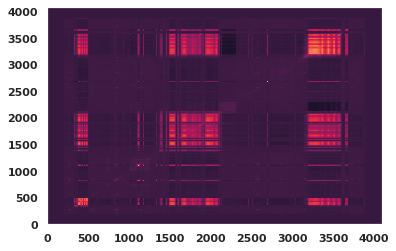

In [1321]:
plt.pcolor(freq_con)

In [ ]:
# 1D slice for 1090, spikes in clean band cov
# Exclude any obs that has prob > x% from mean
# Check calibration issue with Tom

In [1343]:
np.cov(freq[:,1121])

array(0.09941232)

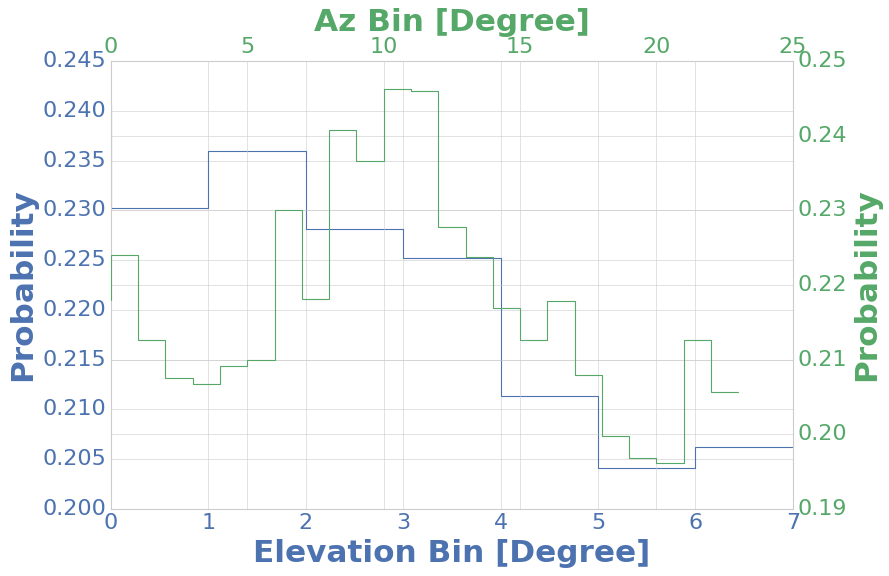

In [687]:
fig=plt.figure(figsize = (11,7))

ax=fig.add_subplot(111, label="1")

ax.step(np.arange(ave[3].shape[0]),ave[3],label='Average RFI',color='C0')
#ax3.set_xticks(4*np.arange(6), ["00H00", "04H00", "08H00", "12H00", "16H00", "20H00", "24H00"])
#ax.set_xticks(np.arange(10,100,step=10))
ax.set_xlabel('Elevation Bin [Degree]', color="C0")
ax.set_ylabel('Probability', color="C0")
ax.tick_params(axis='x', colors="C0")
ax.tick_params(axis='y', colors="C0")

ax2=fig.add_subplot(111, label="2", frame_on=False)

ax2.step(np.arange(ave[4].shape[0]),ave[4],label='Average RFI',color='C1')
ax2.xaxis.tick_top()
ax2.yaxis.tick_right()
ax2.set_xlabel('Az Bin [Degree]', color="C1") 
#ax2.set_xticks(np.arange(0,360,step=15))
ax2.set_ylabel('Probability', color="C1")       
ax2.xaxis.set_label_position('top') 
ax2.yaxis.set_label_position('right') 
ax2.tick_params(axis='x', colors="C1")
ax2.tick_params(axis='y', colors="C1")
plt.show()

In [750]:
def MyPLot(AzProb,ElProb,Mydata):
    
    print(Mydata.shape)
    theta = np.deg2rad(np.arange(0,370,15)) #+ 7.5)
    #r = 90.-ElProb.elevation.values
    r = 80.-ElProb.elevation.values# - 5.0
    #data = ElAzProb.values
    MyNewData = np.append(Mydata.values,Mydata.values[:,0][:,None],axis=1)
    #print(data.shape,r.shape, theta.shape)

    #Create a polar projection
    plt.figure(figsize=(11,8))
    #plt.gca().invert_yaxis()

    ax1 = plt.subplot(projection="polar")

    cmap = ax1.pcolormesh(-theta,r,MyNewData,vmin= 0.0,alpha = 0.75,shading='gouraud')
    ax1.set_yticklabels(np.arange(80,10,-10))

    OwnLabel = [0,315,270,225,180,135,90,45]
    ax1.set_xticklabels(OwnLabel)
    ax1.set_theta_zero_location('N')

    plt.colorbar(cmap)
    plt.show()
    return()

In [751]:
freqValues

array([ 856.        ,  856.20898438,  856.41796875, ..., 1711.37304688,
       1711.58203125, 1711.79101562])

In [752]:
idx1 = np.where(((freqValues>=1310)&(freqValues<=1490)))[0]
idx2 = np.where(((freqValues>=970)&(freqValues<=1080)))[0]
idx = np.append(idx2,idx1)
ChanIndx = idx#np.where((MyMeanFreqProb.frequency.frequency >= FreqLo*1.e6) & 
           #         (MyMeanFreqProb.frequency.frequency <= FreqHi*1.e6))[0]

if len(ChanIndx) != 0:


    SpecMaster = MyMaster.sum(dim = ['time','baseline'])
    SpecMaster = SpecMaster[ChanIndx].sum(dim = ['frequency'])

    SpecCounter = MyCounter.sum(dim = ['time','baseline'])
    SpecCounter = SpecCounter[ChanIndx].sum(dim = ['frequency'])

    SpecProb = SpecMaster.astype(float)/SpecCounter.astype(float)
    SpecProb = SpecProb.persist()

    MyPLot(AzProb,ElProb,SpecProb)
else:
    print("Something went wrong in Frequency selection")

PermissionError: [Errno 13] Permission denied: '/data/isaac/DR0/verification/verifDR0.zarr/master/.zarray'

In [947]:
data2 = xr.open_zarr('/data/HPRFI/DR1VH.zarr/')

In [948]:
MyMaster2 = data2.master.astype(float)
MyCounter2 = data2.counter.astype(float)

In [950]:
ave2 = mean(MyMaster2,MyCounter2) 

time


/home/isaac/.local/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)


frequency
elevation


/home/isaac/.local/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)


baseline


/home/isaac/.local/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)


azimuth


/home/isaac/.local/lib/python3.6/site-packages/dask/core.py:119: RuntimeWarning: invalid value encountered in true_divide
  return func(*args2)


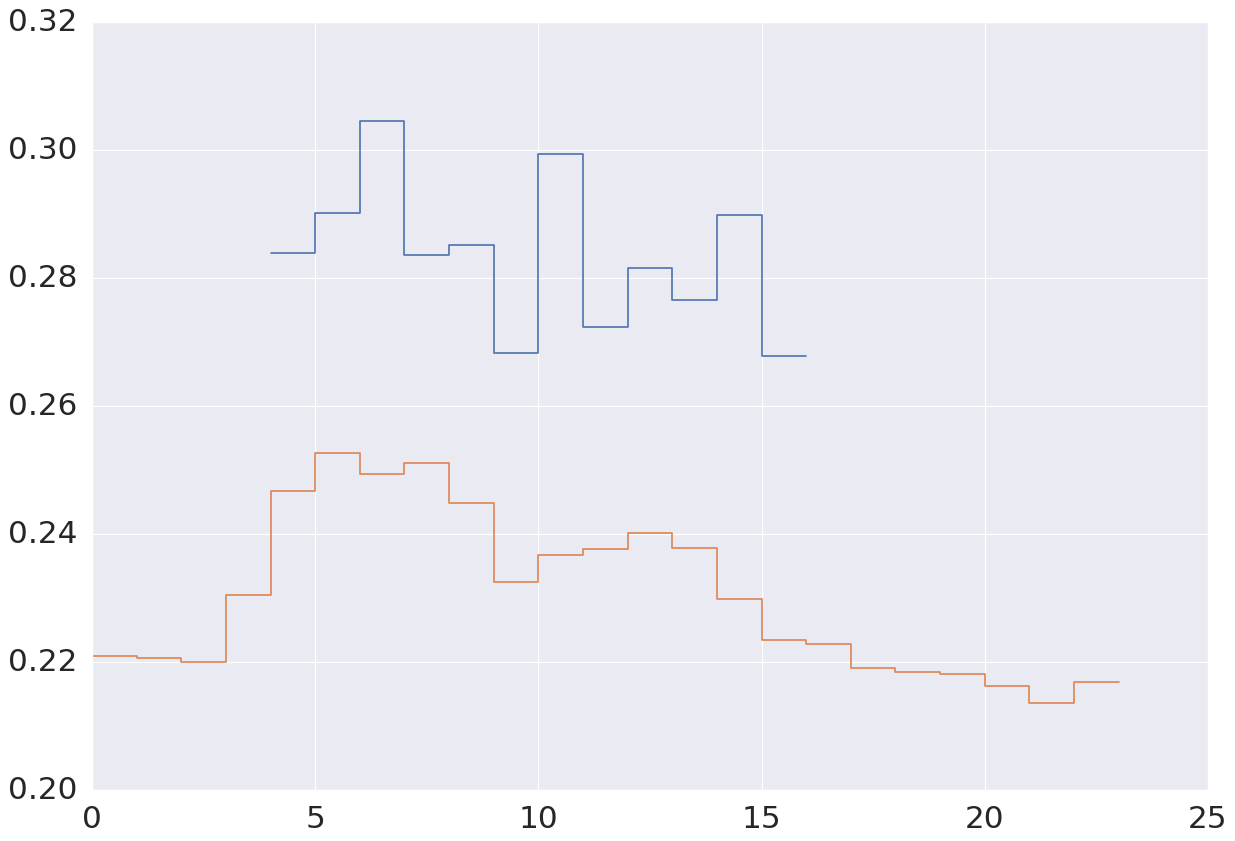

In [960]:
plt.step(data2.time.time,ave2[0])
plt.step(data2.time.time,ave[0])

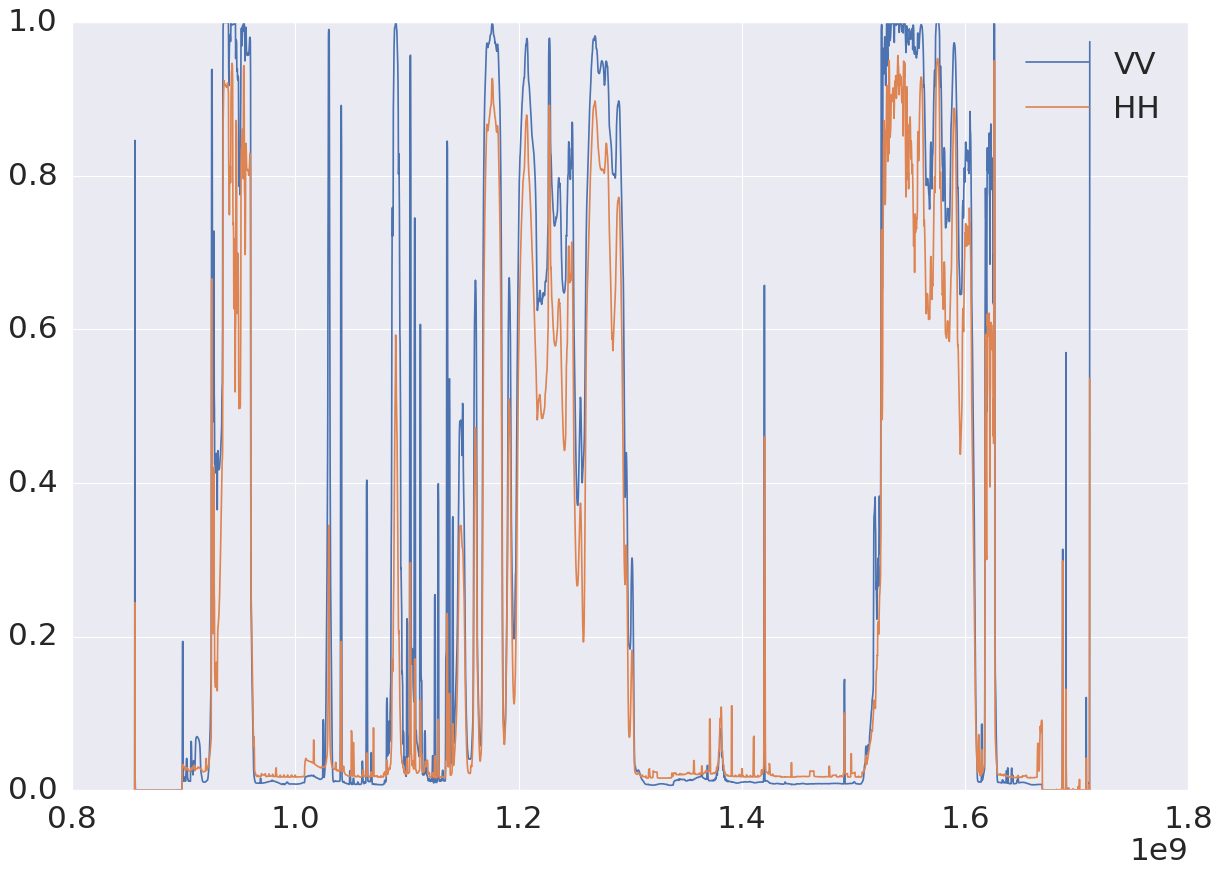

In [957]:
plt.plot(data2.frequency.frequency,ave2[1],label='VV')
plt.plot(data2.frequency.frequency,ave[1],label='HH')
plt.legend()